**Pranay Varma - 2019115067**

**Assignment - 4**

**Clustering and Classification**

**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Downloading and Loading the Dataset**

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Performing Visualizations**

**Univariate Analysis**

**Histplot**

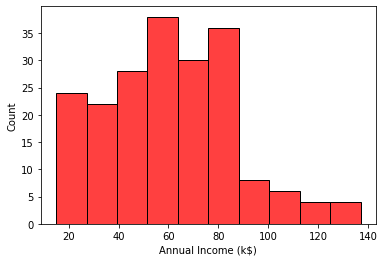

In [5]:
sns.histplot(data['Annual Income (k$)'], color="red")

**Box Plot**

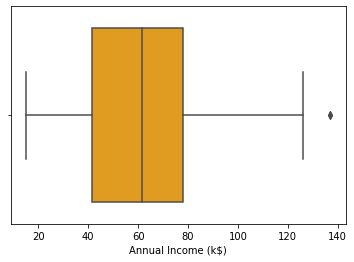

In [6]:
sns.boxplot(data['Annual Income (k$)'], color="orange")

**Dist Plot**

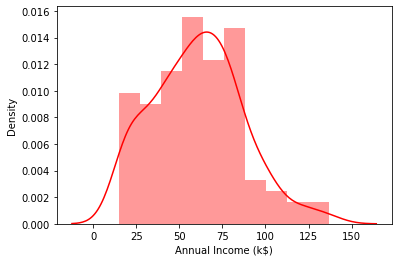

In [7]:
sns.distplot(data['Annual Income (k$)'], color="red")

**Bi-variate Analysis**

**Barplot**

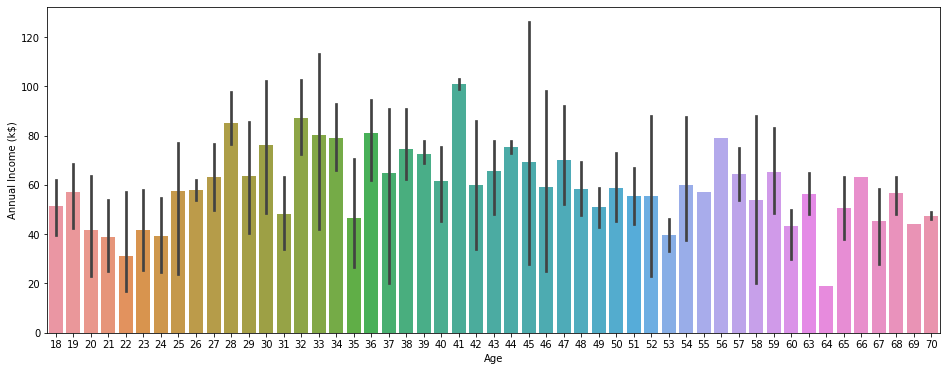

In [8]:
plt.figure(figsize=(16,6))
sns.barplot(data['Age'],data['Annual Income (k$)'])


**Lineplot**

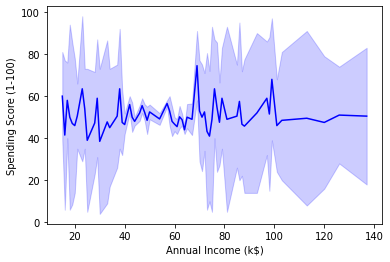

In [9]:
sns.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], color="blue")



**Scatter plot (Age vs Spending Score)**

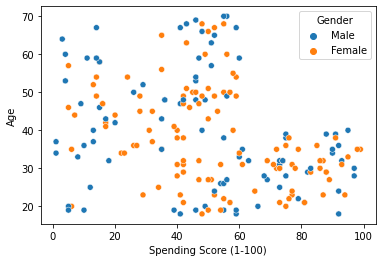

In [11]:
sns.scatterplot(data['Spending Score (1-100)'], data['Age'], hue = data['Gender'])

**Gender vs Age Distribution**

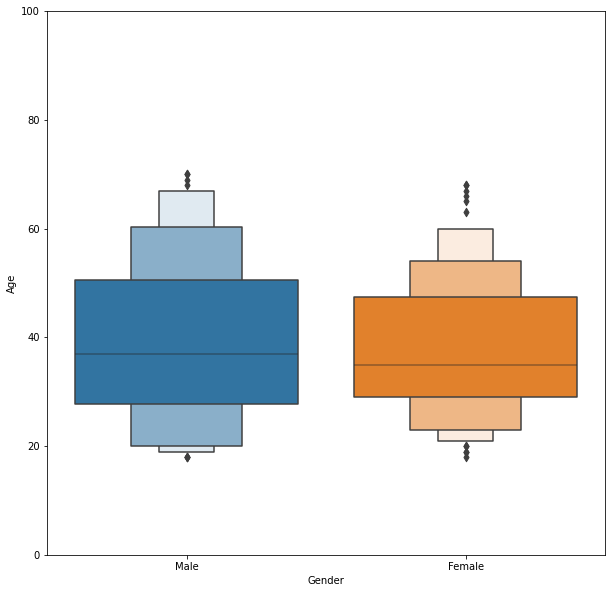

In [13]:
temp = pd.concat([data['Age'], data['Gender']], axis=1)

f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='Gender', y="Age", data=data)
fig.axis(ymin=0, ymax=100);


**Annual Income vs Gender Countplot**


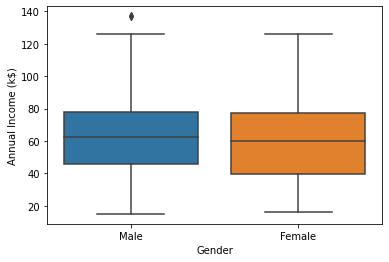

In [17]:
sns.boxplot(x=data['Gender'],y=data['Annual Income (k$)'])

**Multi-variate Analysis**


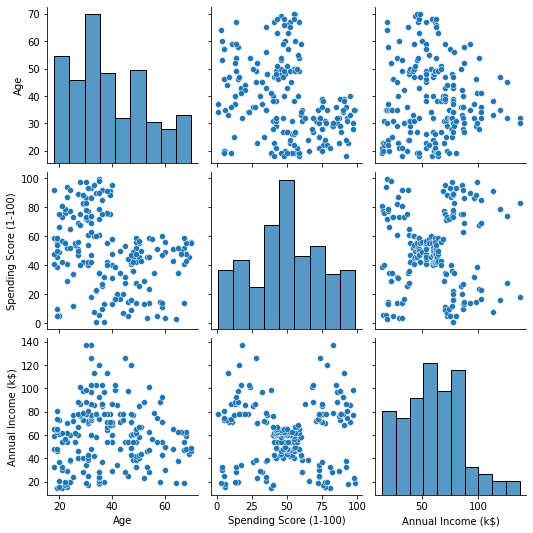

In [16]:
sns.pairplot(data=data[["Age", "Gender","Spending Score (1-100)","Annual Income (k$)"]])

**Correlation between the different attributes**


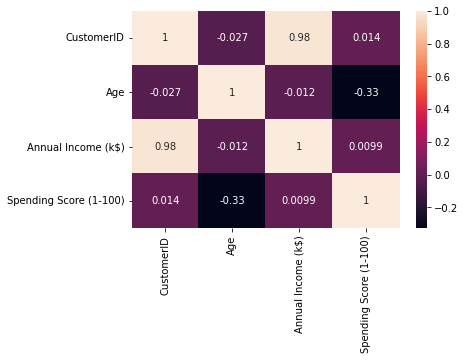

In [18]:
sns.heatmap(data.corr(),annot=True)

**Performing Descriptive Stats on the Dataset**


In [19]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [21]:
data.shape

(200, 5)

**Checking for null values**

In [22]:
data.isnull().any() #Inference: The dataset has no null values

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [23]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Finding the outliers and replacing them**

In [24]:
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

**After removing outliers, boxplot will be like**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fce29225350>,
 'caps': [<matplotlib.lines.Line2D at 0x7fce29225dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fce2921fcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fce2922b8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fce2922be10>],
 'means': []}

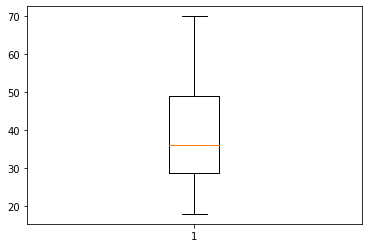

In [25]:
plt.boxplot(data['Age'])


**Checking for categorical columns and performing encoding**


In [26]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [28]:
data['Gender'] = l_en.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


**Scaling the data**

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

**Performing any of the clustering algorithms**


In [30]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([7, 7, 3, 3, 3, 3, 6, 3, 2, 3, 2, 3, 6, 3, 5, 7, 3, 7, 2, 3, 7, 7,
       6, 7, 6, 7, 6, 7, 6, 3, 2, 3, 2, 7, 6, 3, 6, 3, 6, 3, 6, 7, 2, 3,
       6, 3, 6, 3, 3, 3, 6, 7, 3, 2, 6, 2, 6, 2, 3, 2, 2, 7, 6, 6, 2, 7,
       6, 6, 7, 3, 2, 6, 6, 6, 2, 7, 6, 7, 3, 6, 2, 7, 2, 6, 3, 2, 6, 3,
       3, 6, 6, 7, 2, 6, 3, 7, 6, 3, 2, 7, 3, 6, 2, 7, 2, 3, 6, 2, 2, 2,
       2, 3, 6, 7, 3, 3, 6, 6, 6, 6, 7, 6, 0, 1, 3, 0, 5, 1, 2, 1, 5, 1,
       3, 0, 5, 0, 4, 1, 5, 0, 4, 1, 3, 0, 5, 1, 2, 0, 4, 1, 5, 1, 4, 0,
       4, 0, 5, 0, 5, 0, 4, 0, 5, 0, 5, 0, 5, 0, 4, 1, 5, 1, 5, 1, 4, 0,
       2, 1, 2, 1, 4, 0, 5, 0, 4, 1, 4, 1, 4, 0, 4, 0, 5, 0, 4, 0, 4, 1,
       5, 1], dtype=int32)

In [31]:
data1 = pd.DataFrame(data_scaled, columns = data.columns)
data1.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [32]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,7
1,1.0,0.057692,0.000000,0.816327,7
2,0.0,0.038462,0.008493,0.051020,3
3,0.0,0.096154,0.008493,0.775510,3
4,0.0,0.250000,0.016985,0.397959,3


In [33]:
data1['kclus'].unique()

array([7, 3, 6, 2, 5, 0, 1, 4], dtype=int32)

In [34]:
data1['kclus'].value_counts()

6    38
3    37
2    29
7    24
0    22
1    18
5    17
4    15
Name: kclus, dtype: int64

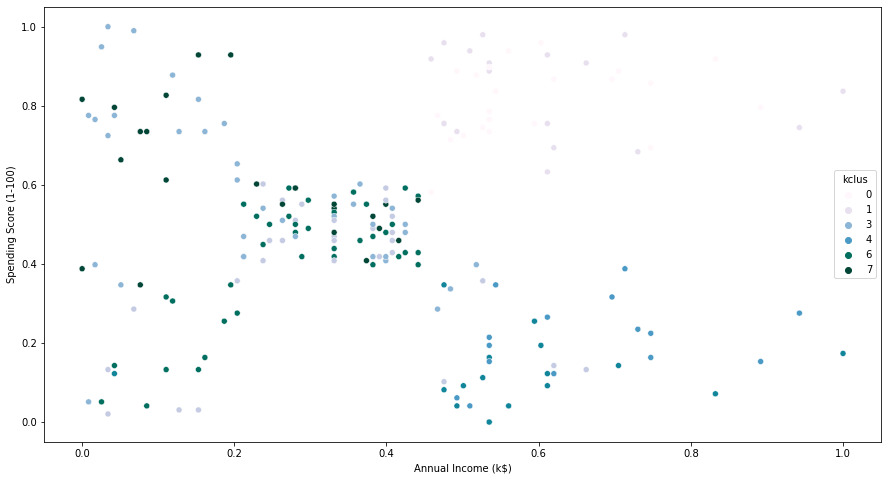

In [35]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [36]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [37]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,7
1,7
2,3
3,3
4,3


**Splitting dataset into train and test data**


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [39]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [40]:
y_train.head()

,kclus
116,6
67,6
78,3
42,2
17,7


In [41]:
y_test.head()

,kclus
58,3
40,6
34,6
102,2
184,4


In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[4.39031105],
       [4.1559159 ],
       [5.62721337],
       [2.60089245],
       [2.53677212]])

**Measuring the performance using metrics**

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  2.9434472020342497
The Root mean squared error is:  1.7156477499866485
The Mean absolute error is:  1.4482445955434948
The accuracy is:  0.3017652920846535
